In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import mpl_finance
from scipy import stats
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = glob.glob('./data/2017/*.txt')

col_names = ['code', 'name', 'open', 'high', 'low', 'close', 'volume']

# get code list
df_code = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
codes = df_code.iloc[1:, 0].as_matrix()

for path in tqdm(paths[1:]):

    df_code = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    codes = list(set(codes) & set(df_code.iloc[1:, 0].as_matrix()))
    
# code filtering
codes = np.array(codes)[np.array(codes) > 1700]

# get price data
df_all = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
date = str(df_all.iloc[0, 0])
date = date[:4] + '-' + date[4:6] + '-' + date[6:]
df_all['date'] = date
df_all = df_all.iloc[1:, :]
df_all = df_all[df_all['code'].isin(codes)]

for path in tqdm(paths[1:]):
    
    df = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    date = str(df.iloc[0, 0])
    date = date[:4] + '-' + date[4:6] + '-' + date[6:]
    df['date'] = date
    df = df.iloc[1:, :]
    df = df[df['code'].isin(codes)]
    df_all = pd.concat([df_all, df])

df_all['date'] = pd.to_datetime(df_all['date'])
df_all = df_all.sort_values(by=['code', 'date'], ascending=True)
print(len(df_all))

100%|██████████| 246/246 [00:14<00:00, 17.35it/s]


715806


In [3]:
c = 7203

start_date = '2017-01-01'
end_date = '2017-06-30'

* Moving Average Convergence/Divergence
    * http://www.procrasist.com/entry/14-technical-analysis
    * https://www.jibunbank.co.jp/products/foreign_deposit/chart/help/macd/

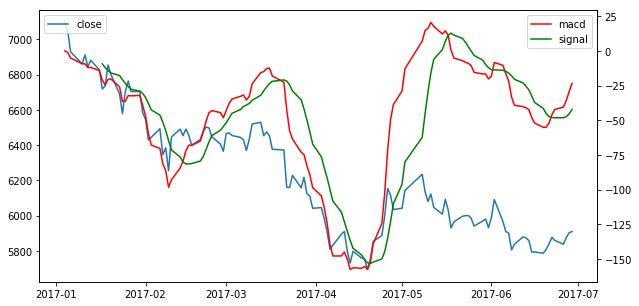

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False], dtype=bool),
 array([ True, False

In [4]:
# 移動平均収束拡散法（Moving Average Convergence/Divergence; MACD）

df_tmp = df_all[df_all['code'] == c]
df_tmp = df_tmp[(start_date < df_tmp['date']) & (df_tmp['date'] < end_date)]

ema_short_period = 12
ema_long_period = 26
sma_period = 9

macd = df_tmp['close'].ewm(span=ema_short_period).mean() - df_tmp['close'].ewm(span=ema_long_period).mean()
signal = macd.rolling(sma_period).mean()

cross = macd > signal
golden =  np.array((cross != np.roll(cross, 1)) & (cross == True))
dead = np.array((cross != np.roll(cross, 1)) & (cross == False))

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df_tmp['date'], df_tmp['close'])
ax1.legend(loc=2)
ax2 = ax1.twinx()
ax2.plot(df_tmp['date'], macd, color='red', label='macd')
ax2.plot(df_tmp['date'], signal, color='green', label='signal')
ax2.legend(loc=1)
plt.show()
golden, dead